In [1]:
import os
import subprocess
import numpy as np
import pandas as pd
from astropy.io import ascii
from astropy.table import Table, vstack
from astropy.coordinates import SkyCoord
from astropy import units as u
import matplotlib.pyplot as plt

In [2]:
outTableDir = '/home/mj1e16/outTables15/'

In [251]:
tabTot =  ascii.read('/home/mj1e16/keplerPhotometry/sexdiffOutNew2.csv')
#matchTab = ascii.read(outTableDir+'foundObjects_0_686.csv')

In [3]:
tabTot = ascii.read('/home/mj1e16/outTables15/matchplus3Magdiff')
gaiatab = ascii.read('/home/mj1e16/outTables15/GaiaMatches.csv')

In [15]:
tabTotPlusOrigMag = ascii.read('/home/mj1e16/outTables15/matchplus3Magdiff.csv')

In [17]:
origMagindex = tabTotPlusOrigMag['index']
origMag = tabTotPlusOrigMag['MAG_BEST_ORIG']

In [252]:
index = np.linspace(0,len(tabTot)-1,len(tabTot))
index = [int(x) for x in index]
tabTot['index'] = index

In [253]:
matchTabTot = ascii.read(outTableDir+'ds9Matches.csv')

In [10]:
def findMatchesGaia(tab,gaia,max_sep = 15.0 * u.arcsec):

    matches = 'not matched'
    ra1 = gaia['ra']
    dec1 = gaia['dec']
    print(len(dec1))
    idx = []
    number = tab['index']
    ra2 = tab['RA']
    dec2 = tab['DEC']    
    catalog = SkyCoord(ra=ra1*u.degree, dec=dec1*u.degree)
    c = SkyCoord(ra=ra2*u.degree, dec=dec2*u.degree)
    idx, d2d, d3d = c.match_to_catalog_sky(catalog)
    sep_constraint = d2d < max_sep
    objectsFound = number[sep_constraint]
    df = tab.to_pandas()
    df = df[df['index'].isin(objectsFound)]
    
#     idx, d2d, d3d = catalog.match_to_catalog_sky(c)
#     sep_constraint = d2d < max_sep
#     objectsFound = number[sep_constraint]
#     df = tab.to_pandas()
#     df = df[df['index'].isin(objectsFound)]
    
    return df

In [ ]:
def findMatchesNoCondition(tab,match,max_sep = 15.0 * u.arcsec):

    matches = 'not matched'
    ra1 = match['RA']
    dec1 = match['DEC']
    print(len(dec1))
    idx = []
    number = tab['index']
    ra2 = tab['RA']
    dec2 = tab['DEC']    
    catalog = SkyCoord(ra=ra1, dec=dec1,unit=(u.hourangle,u.deg),frame='fk5')
    c = SkyCoord(ra=ra2*u.degree, dec=dec2*u.degree)
    idx, d2d, d3d = c.match_to_catalog_sky(catalog)
    sep_constraint = d2d < max_sep
    objectsFound = number[sep_constraint]

    return objectsFound

In [38]:
gaiatab[0]

dist,solution_id,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_good_obs_ac,astrometric_n_bad_obs_al,astrometric_n_bad_obs_ac,astrometric_delta_q,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_primary_flag,astrometric_relegation_factor,astrometric_weight_al,astrometric_weight_ac,astrometric_priors_used,matched_observations,duplicated_source,scan_direction_strength_k1,scan_direction_strength_k2,scan_direction_strength_k3,scan_direction_strength_k4,scan_direction_mean_k1,scan_direction_mean_k2,scan_direction_mean_k3,scan_direction_mean_k4,phot_g_n_obs,phot_g_mean_flux,phot_g_mean_flux_error,phot_g_mean_mag,phot_variable_flag,l,b,ecl_lon,ecl_lat
float64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,int64,int64,int64,float64,float64,float64,str5,float64,float64,float64,int64,int64,str5,float64,float64,float64,float64,float64,float64,float64,float64,int64,float64,float64,float64,str13,float64,float64,float64,float64
0.00047909650054799783,1635378410781933568,2128055002659779200,1042102937,2015.0,293.1514940868599,0.07164490391542369,46.066247842236635,0.12396857877721382,0.0,0.0,0.0,0.0,0.0,0.0,0.42125,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,105,0,105,0,0,0,0.0,0.39721614826895507,96.89847531425184,False,3.977598,5.516839,0.0,2,15,False,0.36110175,0.14999329,0.4001837,0.017928444,-89.949036,62.729675,39.88107,34.643337,121,75171.63351571799,35.41305690773831,13.334635094399497,NOT_AVAILABLE,78.54552365246384,12.594417087760489,312.38926458790684,66.13201867481868


In [35]:
matched = findMatchesGaia(tabTot,gaiatab,max_sep=5*u.arcsec)

244


In [34]:
gpd = gaiatab.to_pandas()
gpd.sort_values('dec')
matched.sort_values(['DEC'])
dist = gpd['dist'].tolist()
gmag = gpd['phot_g_mean_mag'].tolist()
magBestIndexs = matched['index'].tolist()
magBest = [x for x,y in zip(origMag,origMagindex) if y in magBestIndexs]

In [30]:
colour = [x-y for x,y in zip(gmag,magBest)]
magnitude = [m - 5*np.log10(d*1000000) + 5 for m,d in zip(gmag,dist)]

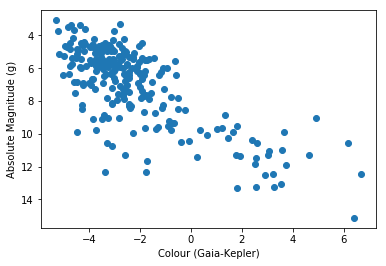

In [31]:
plt.plot(colour,magnitude,'o')
plt.ylabel('Absolute Magnitude (g)')
plt.xlabel('Colour (Gaia-Kepler)')
plt.gca().invert_yaxis()
plt.show()

In [261]:
transients = findMatchesNoCondition(tabTot,matchTabTot)

387619


In [262]:
nums = []
for x in range(len(transients)):
    nums.append(transients[x])

In [264]:
pantab = tabTot.to_pandas()

In [265]:
pantab = pantab[~pantab['index'].isin(nums)]

In [266]:
pantab.to_csv('/home/mj1e16/outTables15/firstPassTransients15.csv',sep=',')

In [ ]:
newtabTot = Table.from_pandas(pantab)

In [189]:
print(len(pantab))
transients = findMatchesNoCondition(tabTot,matchTabTot)
nums = []
for x in range(len(transients)):
    nums.append(transients[x])
newpantab = pantab[~pantab['index'].isin(nums)]
newpantab.to_csv('secondPassTransients.csv',sep=',')
print(len(newpantab))

505729
190511
505729


In [243]:
def openandPlot(index,df):
    regfile = '/home/mj1e16/outTables2/quickreg.reg'
    row = df[df['index'] == index]
    name = row['NAME'].values[0]
    xpos = row['X_IMAGE'].values[0]
    ypos = row['Y_IMAGE'].values[0]
    ra = row['RA'].values[0]
    dec = row['DEC'].values[0]
    print(name)
    with open(regfile,'w') as f:
        f.write('global color=lightgreen\nFK5\ncircle({0},{1},{2})\ncircle({0},{1},{3})'.format(ra,dec,5./3600.,60./3600.))
    print(['ds9','/media/mj1e16/PP AV-TV/keplerCal/'+name,'-r',regfile])
    subprocess.call(['ds9','/media/mj1e16/PP AV-TV/keplerCal/'+name,'-regions',regfile])
    

In [33]:
# for x in mininames:
#     openandPlot(x,newpantab)
#     print(x)

In [65]:
def testfindMatches(tabMini,matchTab,arcsec=5./3600.,max_sep = 5.0 * u.arcsec):

    matches = 'not matched'
    ra1 = matchTab['RA']
    dec1 = matchTab['DEC']
    idx = []
    ra2 = tabMini['RA']
    dec2 = tabMini['DEC']    
    c = SkyCoord(ra=ra1, dec=dec1,unit=(u.hourangle,u.deg),frame='fk5')
    catalog = SkyCoord(ra=ra2*u.degree, dec=dec2*u.degree)
    idx, d2d, d3d = c.match_to_catalog_sky(catalog)
    sep_constraint = d2d < max_sep
    c_matches = c[sep_constraint]
    catalog_matches = catalog[idx[sep_constraint]]
    #matches = [x for x in d3d if x < arcsec]
    print(d3d)
    print(len(d3d))
    print(len(matchTab))
#     tabMini.remove_rows(idx)
    return catalog_matches

In [50]:
tablength = 686000
matchTabs = os.listdir('/home/mj1e16/outTables/')


for seg in range(1000):
    minnum = seg*tablength/1000
    maxnum = (seg+1)*tablength/1000
    miniTab = tabTot[minnum:maxnum]
    matchTab = ascii.read(outTableDir+'foundObjects_{}_{}.csv'.format(minnum,maxnum))
    #print(len(matchTab))
    print(outTableDir+'foundObjects_{}_{}.csv'.format(minnum,maxnum))
    #matchTab = ascii.read('/home/mj1e16/outTables/'+matchTabs[seg])
    if seg == 0:
        transients = testfindMatches(miniTab,matchTab)
    else:
        newtab = testfindMatches(miniTab,matchTab)
        print(len(newtab))
        transients = vstack([transients,newtab])

/home/mj1e16/outTables/foundObjects_0_686.csv
/home/mj1e16/outTables/foundObjects_686_1372.csv
502
/home/mj1e16/outTables/foundObjects_1372_2058.csv
562
/home/mj1e16/outTables/foundObjects_2058_2744.csv
534
/home/mj1e16/outTables/foundObjects_2744_3430.csv
501
/home/mj1e16/outTables/foundObjects_3430_4116.csv
439
/home/mj1e16/outTables/foundObjects_4116_4802.csv
516
/home/mj1e16/outTables/foundObjects_4802_5488.csv
490
/home/mj1e16/outTables/foundObjects_5488_6174.csv
522
/home/mj1e16/outTables/foundObjects_6174_6860.csv
495
/home/mj1e16/outTables/foundObjects_6860_7546.csv
480
/home/mj1e16/outTables/foundObjects_7546_8232.csv
487
/home/mj1e16/outTables/foundObjects_8232_8918.csv
483
/home/mj1e16/outTables/foundObjects_8918_9604.csv
531
/home/mj1e16/outTables/foundObjects_9604_10290.csv
457
/home/mj1e16/outTables/foundObjects_10290_10976.csv
470
/home/mj1e16/outTables/foundObjects_10976_11662.csv
518
/home/mj1e16/outTables/foundObjects_11662_12348.csv
515
/home/mj1e16/outTables/foundOb

In [15]:
dirlist = os.listdir('/home/mj1e16/outTables/')
wrongtabs = []
for x in range(len(dirlist)):
    if x ==0:
        tab = ascii.read(outTableDir+dirlist[x])
    else:
        try:
            addtab = ascii.read(outTableDir+dirlist[x])
            tab = vstack([tab,addtab])
        except:
            wrongtabs.append(dirlist[x])

In [23]:
transients = testfindMatches(tabTot,tab)

In [51]:
pantran = transients.to_pandas()
